In [62]:
#import requests
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import nltk

In [63]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


True

In [64]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [90]:
companies = ['GOOG', 'AMZN', 'AAPL', 'TSLA']

news_tables = {}

for company in companies:
    url = f'https://finviz.com/quote.ashx?t={company}'

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, 'html')

    news_table = html.find('table', id = 'news-table')
    news_tables[company] = news_table
    

In [91]:
parsed_data =[]
for company, news_table in news_tables.items():
    for row in news_table.find_all('tr'):
        title = row.a.get_text().strip()
        date_data = row.td.text.strip().split(' ')
        link = row.a['href']
        #print(date_data)

        if len(date_data) == 1:
            time = date_data[0]
        else:
            if date_data[0] == 'Today':
                today = datetime.today().date()
                date = today.strftime('%m-%d-%y')
            else:
                date = date_data[0]
                time = date_data[1]
        
        parsed_data.append([company, date, time, title, link])
    print(parsed_data)

[['GOOG', '05-24-24', '12:05PM', 'Nvidia Is the Clear Beneficiary of AI. The Benefit Is Less Clear for Everyone Else.', 'https://finance.yahoo.com/m/9efd1d3f-30dd-34c7-811f-7d3664f19d87/nvidia-is-the-clear.html'], ['GOOG', '05-24-24', '04:05PM', "Under-investing in Mag 7 could mean 'big trouble': Strategist", 'https://finance.yahoo.com/video/under-investing-mag-7-could-200526476.html'], ['GOOG', '05-24-24', '04:01PM', 'As Nvidia Smashes Targets, This Mag 7 Stock Teases Buy Point, Record High', 'https://finance.yahoo.com/m/0b8a61b8-5797-34e8-84b5-1b05b22cec5f/as-nvidia-smashes-targets%2C.html'], ['GOOG', '05-24-24', '02:01PM', '3 Stocks That Could Be the Cornerstone of Your Dream Portfolio', 'https://investorplace.com/2024/05/3-stocks-that-could-be-the-cornerstone-of-your-dream-portfolio/'], ['GOOG', '05-24-24', '02:00PM', 'Hedge Fund and Insider Trading News: Ken Griffin, Davidson Kempner, Segantii Capital, Citadel LLC, Shift4 Payments Inc (FOUR), Citi Trends, Inc. (CTRN), and More', '

In [125]:
df = pd.DataFrame(parsed_data, columns=['company', 'date', 'time', 'title', 'link'])

In [126]:
df.head()

,company,date,time,title,link
0,GOOG,05-24-24,12:05PM,Nvidia Is the Clear Beneficiary of AI. The Ben...,https://finance.yahoo.com/m/9efd1d3f-30dd-34c7...
1,GOOG,05-24-24,04:05PM,Under-investing in Mag 7 could mean 'big troub...,https://finance.yahoo.com/video/under-investin...
2,GOOG,05-24-24,04:01PM,"As Nvidia Smashes Targets, This Mag 7 Stock Te...",https://finance.yahoo.com/m/0b8a61b8-5797-34e8...
3,GOOG,05-24-24,02:01PM,3 Stocks That Could Be the Cornerstone of Your...,https://investorplace.com/2024/05/3-stocks-tha...
4,GOOG,05-24-24,02:00PM,Hedge Fund and Insider Trading News: Ken Griff...,https://www.insidermonkey.com/blog/hedge-fund-...


In [127]:
vader = SentimentIntensityAnalyzer()

In [129]:
df['compound'] = df['title'].apply(lambda x: vader.polarity_scores(x)['compound'])
df['compound']

0      0.8834
1      0.0000
2     -0.2960
3      0.2500
4      0.0000
        ...  
395    0.0000
396    0.3818
397   -0.4019
398   -0.6124
399   -0.3182
Name: compound, Length: 400, dtype: float64

In [130]:
df['date'] = pd.to_datetime(df['date']).dt.date

C:\Users\HP\AppData\Local\Temp\ipykernel_34984\3213096763.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date']).dt.date


In [131]:
df.head()

,company,date,time,title,link,compound
0,GOOG,2024-05-24,12:05PM,Nvidia Is the Clear Beneficiary of AI. The Ben...,https://finance.yahoo.com/m/9efd1d3f-30dd-34c7...,0.8834
1,GOOG,2024-05-24,04:05PM,Under-investing in Mag 7 could mean 'big troub...,https://finance.yahoo.com/video/under-investin...,0.0000
2,GOOG,2024-05-24,04:01PM,"As Nvidia Smashes Targets, This Mag 7 Stock Te...",https://finance.yahoo.com/m/0b8a61b8-5797-34e8...,-0.2960
3,GOOG,2024-05-24,02:01PM,3 Stocks That Could Be the Cornerstone of Your...,https://investorplace.com/2024/05/3-stocks-tha...,0.2500
4,GOOG,2024-05-24,02:00PM,Hedge Fund and Insider Trading News: Ken Griff...,https://www.insidermonkey.com/blog/hedge-fund-...,0.0000


In [136]:
time_df = df.groupby(['company', 'time'])['compound'].mean()
time_df

company  time   
AAPL     01:23PM    0.3252
         01:40PM    0.0000
         01:50AM    0.3818
         01:51PM    0.0000
         01:57PM   -0.2263
                     ...  
TSLA     12:52PM    0.2023
         12:54PM   -0.4767
         12:56PM   -0.6808
         12:57PM    0.0000
         12:59PM    0.0000
Name: compound, Length: 332, dtype: float64

In [137]:
time_df = time_df.unstack()

In [138]:
time_df = time_df.transpose()

In [139]:
time_df.head()

company,AAPL,AMZN,GOOG,TSLA
time,,,,
01:03PM,NaN,0.0258,NaN,NaN
01:05PM,NaN,NaN,0.6369,NaN
01:06PM,NaN,NaN,0.1779,0.0000
01:07PM,NaN,NaN,NaN,0.1480
01:10PM,NaN,NaN,0.0000,0.3818


In [100]:
mean_df = df.groupby(['company', 'date'])['compound'].mean()
mean_df.head(30)

company  date      
AAPL     2024-05-21    0.069167
         2024-05-22    0.148662
         2024-05-23    0.175867
         2024-05-24    0.170880
AMZN     2024-05-21    0.200709
         2024-05-22    0.073851
         2024-05-23    0.240397
         2024-05-24    0.177268
GOOG     2024-05-23    0.166438
         2024-05-24    0.174998
TSLA     2024-05-22    0.069978
         2024-05-23    0.069000
         2024-05-24    0.014224
Name: compound, dtype: float64

In [101]:
mean_df = mean_df.unstack()

In [110]:
mean_df = mean_df.transpose()


company,AAPL,AMZN,GOOG,TSLA
date,,,,
2024-05-21,0.069167,0.200709,NaN,NaN
2024-05-22,0.148662,0.073851,NaN,0.069978
2024-05-23,0.175867,0.240397,0.166438,0.069000
2024-05-24,0.170880,0.177268,0.174998,0.014224


In [119]:
def plotter(data, col1, col2, col3, col4, date):
    plt.figure(figsize=(18,5))
    sns.set_style('darkgrid')

    plt.subplot(1, 4, 1)
    sns.barplot(data=data, y = col1, x= date, color= 'red')

    plt.subplot(1, 4, 2)
    sns.barplot(data=data, y = col2, x= date, color= 'blue')

    plt.subplot(1, 4, 3)
    sns.barplot(data=data, y = col3, x= date, color= 'yellow')

    plt.subplot(1, 4, 4)
    sns.barplot(data=data, y = col4, x= date, color= 'black')

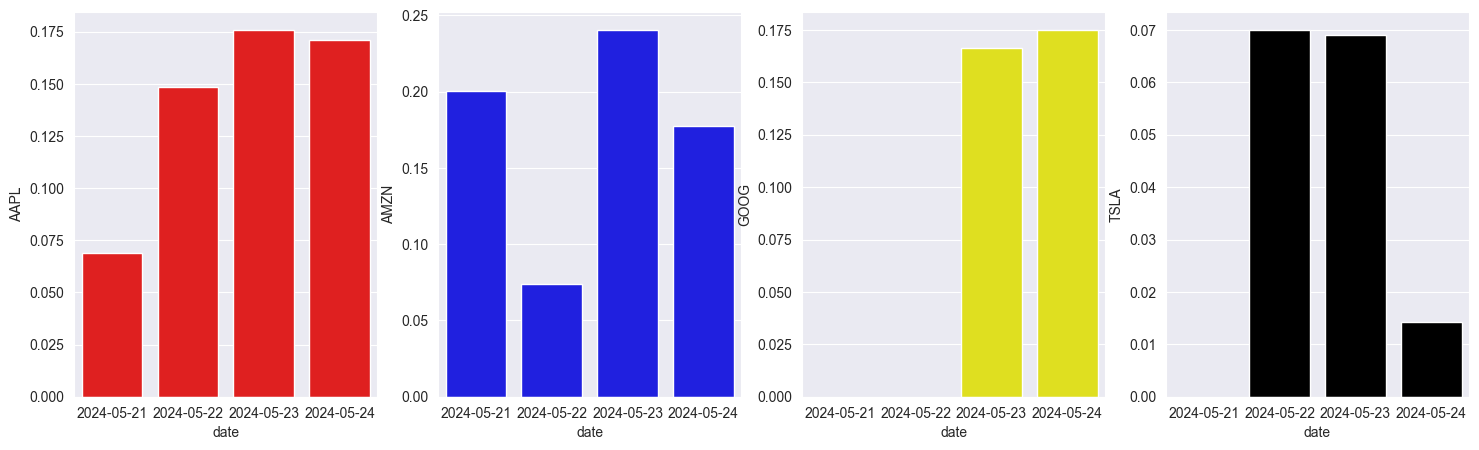

In [120]:
plotter(mean_df, 'AAPL', 'AMZN', 'GOOG', 'TSLA', 'date')


In [144]:
def plotter2(data, col1, col2, date):
    plt.figure(figsize=(70,5))
    sns.set_style('darkgrid')

    plt.subplot(1, 4, 1)
    sns.lineplot(data=data, y = col1, x= date, color= 'red')

    plt.subplot(1, 4, 2)
    sns.lineplot(data=data, y = col2, x= date, color= 'blue')



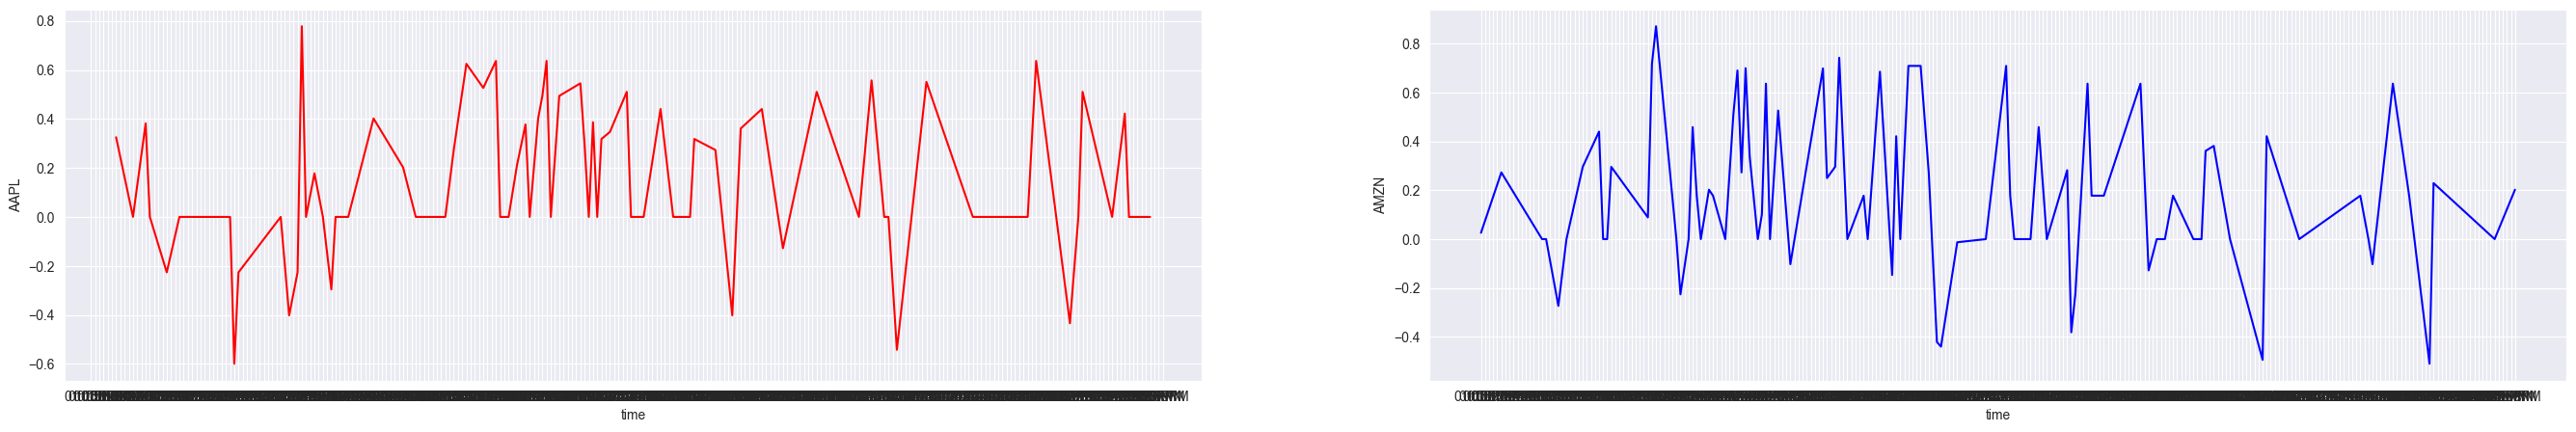

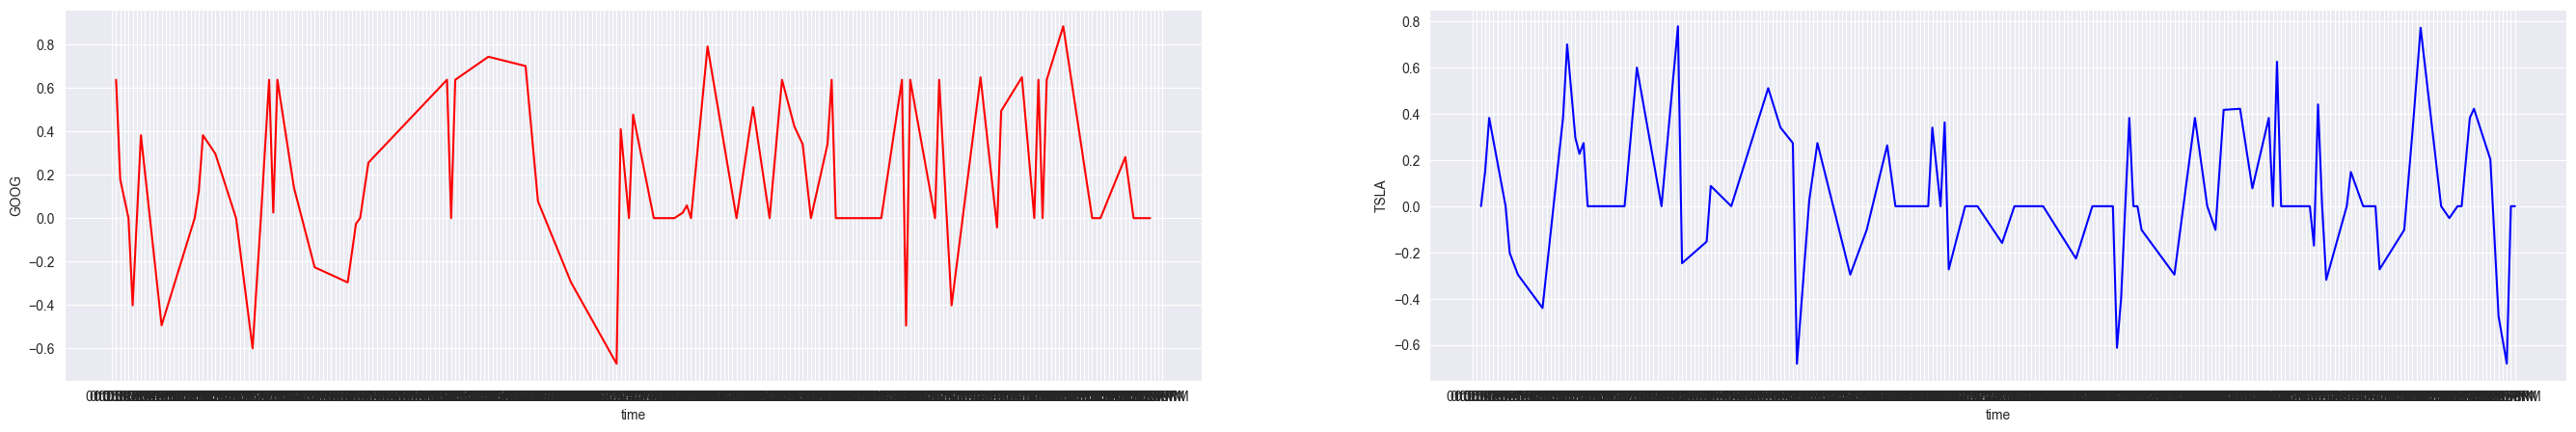

In [145]:
plotter2(time_df, 'AAPL', 'AMZN', 'time')
plotter2(time_df, 'GOOG', 'TSLA', 'time')